# Custom layers in PyTorch

## Table of contents

1. [Understanding custom layers](#understanding-custom-layers)
2. [Setting up the environment](#setting-up-the-environment)
3. [Creating a basic custom layer](#creating-a-basic-custom-layer)
4. [Implementing parameterized custom layers](#implementing-parameterized-custom-layers)
5. [Applying custom layers in simple networks](#applying-custom-layers-in-simple-networks)
6. [Building a custom activation layer](#building-a-custom-activation-layer)
7. [Building a custom normalization layer](#building-a-custom-normalization-layer)
8. [Testing and validating custom layers](#testing-and-validating-custom-layers)
9. [Experimenting with custom layers](#experimenting-with-custom-layers)

## Understanding custom layers

### **Key concepts**
Custom layers in PyTorch allow developers to create unique components tailored to specific tasks, going beyond the standard layers provided in PyTorch's `torch.nn` module. These layers are typically implemented by subclassing `torch.nn.Module` and defining the required functionality in the `forward` method. This flexibility makes PyTorch highly extensible, enabling the design of innovative architectures and experimentation with novel ideas.

Key aspects of custom layers include:
- **Parameter definition**: Custom layers can include learnable parameters such as weights and biases, initialized using PyTorch’s built-in methods.
- **Custom operations**: Incorporates any computation, from simple transformations to complex algorithms.
- **Integration**: Easily combines with standard PyTorch layers in a seamless workflow.

Custom layers are essential for creating architectures that address specific problem domains or leverage unconventional data transformations.

### **Applications**
Custom layers are widely used in scenarios requiring specialized computations:
- **Novel architectures**: Designing unique models for domain-specific tasks, such as graph neural networks or self-attention mechanisms.
- **Feature engineering**: Applying task-specific transformations that are not readily available in existing layers.
- **Experimental research**: Testing new ideas or algorithms in a flexible deep learning framework.
- **Adapting to non-standard data**: Customizing layers for data types or formats that standard layers cannot handle.

### **Advantages**
- **Flexibility**: Allows for any custom computation or transformation.
- **Modularity**: Easily integrates with existing PyTorch workflows and modules.
- **Optimization-ready**: Supports automatic differentiation and PyTorch optimizers out of the box.
- **Reusability**: Once created, custom layers can be reused across multiple projects.

### **Challenges**
- **Complexity**: Requires a deeper understanding of PyTorch's internals and tensor operations.
- **Debugging difficulty**: Custom implementations may introduce errors that are harder to identify compared to standard layers.
- **Performance optimization**: Ensuring efficiency, particularly for complex operations, may require additional effort.
- **Code maintenance**: Custom layers often need thorough documentation and testing for long-term usability.

## Setting up the environment


##### **Q1: How do you install the necessary libraries for building and training custom layers in PyTorch?**


In [1]:
# !pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121
# !pip install numpy matplotlib scikit-learn pandas

##### **Q2: How do you import the required modules for creating custom layers and handling model training in PyTorch?**


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

##### **Q3: How do you configure your environment to leverage a GPU for training custom layers, and how do you fallback to CPU in PyTorch?**

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cuda


## Creating a basic custom layer


##### **Q4: How do you define a simple custom layer by subclassing `torch.nn.Module`?**


In [4]:
class CustomLayer(nn.Module):
    def __init__(self):
        super(CustomLayer, self).__init__()

##### **Q5: How do you implement the forward pass for a basic custom layer in PyTorch?**


In [5]:
class CustomLayer(nn.Module):
    def __init__(self):
        super(CustomLayer, self).__init__()

    def forward(self, x):  # Forward computation
        return x

##### **Q6: How do you instantiate and apply a basic custom layer to an input tensor in PyTorch?**

In [6]:
custom_layer = CustomLayer()
input_tensor = torch.randn(10, 5)  # Example input tensor
output = custom_layer(input_tensor)

In [7]:
print(output)

tensor([[-9.0951e-01, -7.0287e-01, -3.5801e-01,  1.2300e-01, -1.3475e+00],
        [ 8.3705e-01,  3.4548e-01,  2.5762e-01,  1.7408e+00, -1.9194e-01],
        [-7.0493e-01,  1.0350e+00,  9.8656e-01,  6.5432e-01, -1.5543e+00],
        [-1.4975e+00,  1.9227e+00, -8.8100e-01, -9.8794e-01,  1.5105e+00],
        [-9.6338e-02, -1.6519e+00, -5.3000e-01, -6.3569e-01, -2.1093e+00],
        [-2.7068e-01, -1.2378e+00, -1.4838e+00,  1.0941e+00, -9.8592e-01],
        [-1.8774e-03, -5.9884e-01, -2.5590e-01,  1.9741e+00,  1.7806e-01],
        [ 8.3441e-01,  5.5472e-01,  4.7342e-01, -4.2510e-01, -1.8134e-01],
        [ 1.4036e-01,  1.2183e+00,  6.8437e-01,  2.0075e+00,  1.5399e+00],
        [-1.3709e+00,  2.1713e+00, -4.6340e-01, -1.3669e+00, -1.6604e-01]])


## Implementing parameterized custom layers


##### **Q7: How do you create trainable parameters in a custom layer using `nn.Parameter`?**


In [8]:
class CustomLayer(nn.Module):
    def __init__(self, input_size, output_size):
        super(CustomLayer, self).__init__()
        self.weight = nn.Parameter(torch.randn(input_size, output_size))
        self.bias = nn.Parameter(torch.randn(output_size))

    def forward(self, x):
        return x @ self.weight + self.bias

##### **Q8: How do you implement a parameterized custom layer that applies a learned linear transformation to input data?**


In [9]:
class CustomLinearLayer(nn.Module):
    def __init__(self, input_size, output_size):
        super(CustomLinearLayer, self).__init__()
        self.weight = nn.Parameter(torch.randn(input_size, output_size))
        self.bias = nn.Parameter(torch.randn(output_size))

    def forward(self, x):
        return x @ self.weight + self.bias

##### **Q9: How do you initialize custom layer parameters in PyTorch?**


In [10]:
import torch.nn.init as init

class CustomLinearLayer(nn.Module):
    def __init__(self, input_size, output_size):
        super(CustomLinearLayer, self).__init__()
        self.weight = nn.Parameter(torch.Tensor(input_size, output_size))
        self.bias = nn.Parameter(torch.Tensor(output_size))
        self.reset_parameters()

    def reset_parameters(self):
        init.xavier_uniform_(self.weight)  # Xavier initialization
        init.zeros_(self.bias)  # Zero initialization for bias

    def forward(self, x):
        return x @ self.weight + self.bias

In [11]:
# Or:
def reset_parameters(self):
    init.kaiming_uniform_(self.weight, nonlinearity='relu')  # Kaiming initialization
    init.zeros_(self.bias)

##### **Q10: How do you apply a parameterized custom layer in a small neural network for a regression task?**

In [12]:
class RegressionModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(RegressionModel, self).__init__()
        self.custom_layer = CustomLinearLayer(input_size, output_size)

    def forward(self, x):
        return self.custom_layer(x)

## Applying custom layers in simple networks


##### **Q11: How do you use a custom layer alongside PyTorch's built-in layers in a feedforward neural network?**


In [13]:
class FeedforwardModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(FeedforwardModel, self).__init__()
        self.custom_layer = CustomLinearLayer(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.custom_layer(x)
        x = self.relu(x)
        x = self.fc(x)
        return x

##### **Q12: How do you define a small neural network that combines custom layers with standard layers?**


In [14]:
model = FeedforwardModel(input_size=4, hidden_size=16, output_size=3).to(device)  # combine CustomLinearLayer with built-in layers

##### **Q13: How do you train a simple neural network with custom layers using a standard dataset?**

In [15]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X = torch.tensor(iris.data, dtype=torch.float32).to(device)
y = torch.tensor(iris.target, dtype=torch.long).to(device)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = FeedforwardModel(input_size=4, hidden_size=16, output_size=3).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [16]:
num_epochs = 100
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    # Training phase:
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())

    # Validation phase:
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val)
        val_loss = criterion(val_outputs, y_val)
        val_losses.append(val_loss.item())

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], "
              f"Training Loss: {loss.item():.4f}, "
              f"Validation Loss: {val_loss.item():.4f}")

Epoch [10/100], Training Loss: 1.1992, Validation Loss: 1.1314
Epoch [20/100], Training Loss: 0.9582, Validation Loss: 0.9352
Epoch [30/100], Training Loss: 0.7906, Validation Loss: 0.7653
Epoch [40/100], Training Loss: 0.6447, Validation Loss: 0.6138
Epoch [50/100], Training Loss: 0.5278, Validation Loss: 0.5008
Epoch [60/100], Training Loss: 0.4436, Validation Loss: 0.4174
Epoch [70/100], Training Loss: 0.3797, Validation Loss: 0.3525
Epoch [80/100], Training Loss: 0.3275, Validation Loss: 0.2989
Epoch [90/100], Training Loss: 0.2834, Validation Loss: 0.2533
Epoch [100/100], Training Loss: 0.2457, Validation Loss: 0.2150


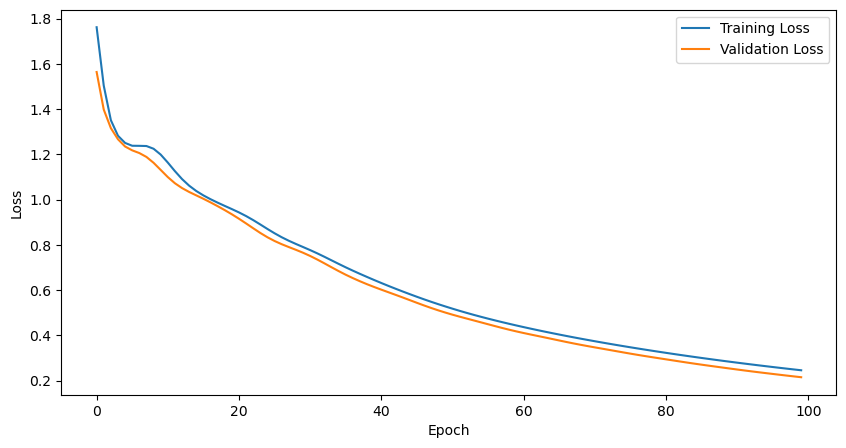

In [17]:
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Building a custom activation layer


##### **Q14: How do you create a custom activation function by subclassing `torch.nn.Module`?**


In [18]:
class CustomActivation(nn.Module):
    def forward(self, x):
        return x * torch.sigmoid(x)  # Swish activation function

##### **Q15: How do you implement a variant of ReLU as a custom activation layer in PyTorch?**


In [19]:
class CustomReLU(nn.Module):
    def forward(self, x):
        return torch.maximum(x, 0.1 * x)  # Leaky ReLU with negative slope of 0.1

##### **Q16: How do you apply your custom activation layer in a small neural network, and how does it compare with built-in activation functions?**

In [20]:
class CustomActivationModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(CustomActivationModel, self).__init__()
        self.custom_layer = CustomLinearLayer(input_size, hidden_size)
        self.custom_activation = CustomActivation()
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.custom_layer(x)
        x = self.custom_activation(x)
        x = self.fc(x)
        return x

In [21]:
class ReLUActivationModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(ReLUActivationModel, self).__init__()
        self.custom_layer = CustomLinearLayer(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.custom_layer(x)
        x = self.relu(x)
        x = self.fc(x)
        return x

In [22]:
num_epochs = 100
learning_rate = 0.01

custom_act_model = CustomActivationModel(input_size=4, hidden_size=16, output_size=3).to(device)
relu_model = ReLUActivationModel(input_size=4, hidden_size=16, output_size=3).to(device)

criterion = nn.CrossEntropyLoss()
optimizer_custom = optim.Adam(custom_act_model.parameters(), lr=learning_rate)
optimizer_relu = optim.Adam(relu_model.parameters(), lr=learning_rate)

In [23]:
train_losses_custom = []
val_losses_custom = []
train_losses_relu = []
val_losses_relu = []

for epoch in range(num_epochs):
    # Train custom activation model:
    custom_act_model.train()
    optimizer_custom.zero_grad()
    outputs_custom = custom_act_model(X_train)
    loss_custom = criterion(outputs_custom, y_train)
    loss_custom.backward()
    optimizer_custom.step()
    train_losses_custom.append(loss_custom.item())

    # Validate custom activation model:
    custom_act_model.eval()
    with torch.no_grad():
        val_outputs_custom = custom_act_model(X_val)
        val_loss_custom = criterion(val_outputs_custom, y_val)
        val_losses_custom.append(val_loss_custom.item())

    # Train ReLU activation model:
    relu_model.train()
    optimizer_relu.zero_grad()
    outputs_relu = relu_model(X_train)
    loss_relu = criterion(outputs_relu, y_train)
    loss_relu.backward()
    optimizer_relu.step()
    train_losses_relu.append(loss_relu.item())

    # Validate ReLU activation model:
    relu_model.eval()
    with torch.no_grad():
        val_outputs_relu = relu_model(X_val)
        val_loss_relu = criterion(val_outputs_relu, y_val)
        val_losses_relu.append(val_loss_relu.item())

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}]")
        print(f"Custom Activation - Training Loss: {loss_custom.item():.4f}, Validation Loss: {val_loss_custom.item():.4f}")
        print(f"ReLU Activation   - Training Loss: {loss_relu.item():.4f}, Validation Loss: {val_loss_relu.item():.4f}")

Epoch [10/100]
Custom Activation - Training Loss: 0.8447, Validation Loss: 0.8132
ReLU Activation   - Training Loss: 0.9863, Validation Loss: 0.9289
Epoch [20/100]
Custom Activation - Training Loss: 0.6030, Validation Loss: 0.5783
ReLU Activation   - Training Loss: 0.7503, Validation Loss: 0.7290
Epoch [30/100]
Custom Activation - Training Loss: 0.4532, Validation Loss: 0.4333
ReLU Activation   - Training Loss: 0.6016, Validation Loss: 0.5821
Epoch [40/100]
Custom Activation - Training Loss: 0.3418, Validation Loss: 0.3253
ReLU Activation   - Training Loss: 0.4936, Validation Loss: 0.4695
Epoch [50/100]
Custom Activation - Training Loss: 0.2472, Validation Loss: 0.2371
ReLU Activation   - Training Loss: 0.4217, Validation Loss: 0.4102
Epoch [60/100]
Custom Activation - Training Loss: 0.1769, Validation Loss: 0.1732
ReLU Activation   - Training Loss: 0.3712, Validation Loss: 0.3599
Epoch [70/100]
Custom Activation - Training Loss: 0.1310, Validation Loss: 0.1295
ReLU Activation   - Trai

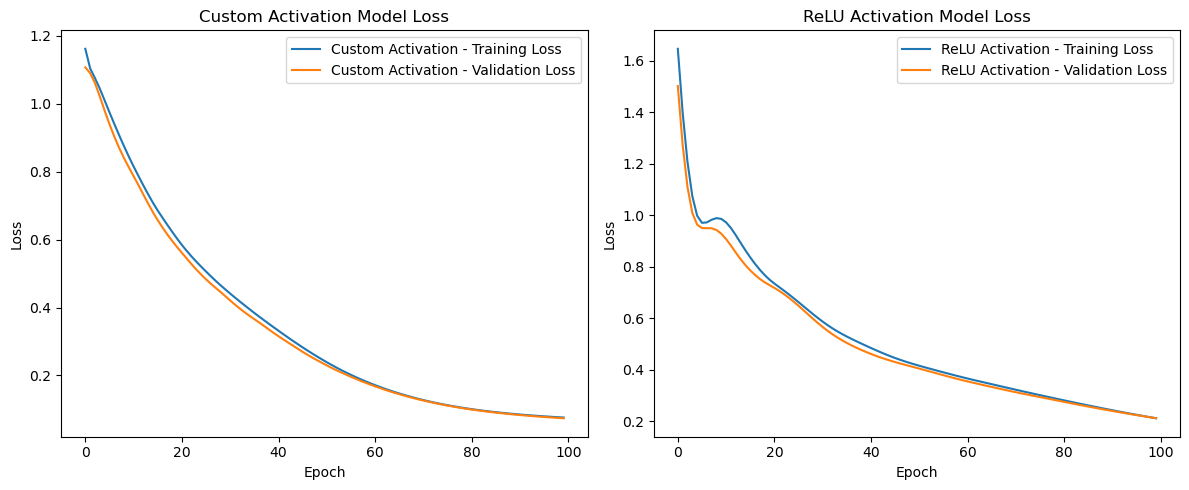

In [24]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(train_losses_custom, label='Custom Activation - Training Loss')
plt.plot(val_losses_custom, label='Custom Activation - Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Custom Activation Model Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(train_losses_relu, label='ReLU Activation - Training Loss')
plt.plot(val_losses_relu, label='ReLU Activation - Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('ReLU Activation Model Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [25]:
custom_act_model.eval()
relu_model.eval()
with torch.no_grad():
    # Custom activation model:
    val_outputs_custom = custom_act_model(X_val)
    _, predicted_custom = torch.max(val_outputs_custom.data, 1)
    total_custom = y_val.size(0)
    correct_custom = (predicted_custom == y_val).sum().item()
    accuracy_custom = (correct_custom / total_custom) * 100

    # ReLU activation model:
    val_outputs_relu = relu_model(X_val)
    _, predicted_relu = torch.max(val_outputs_relu.data, 1)
    total_relu = y_val.size(0)
    correct_relu = (predicted_relu == y_val).sum().item()
    accuracy_relu = (correct_relu / total_relu) * 100

print(f'Custom Activation Model Validation Accuracy: {accuracy_custom:.2f}%')
print(f'ReLU Activation Model Validation Accuracy: {accuracy_relu:.2f}%')

Custom Activation Model Validation Accuracy: 100.00%
ReLU Activation Model Validation Accuracy: 96.67%


## Building a custom normalization layer


##### **Q17: How do you implement a custom batch normalization layer using `nn.Module`?**


In [26]:
class CustomBatchNorm1d(nn.Module):
    def __init__(self, num_features, eps=1e-5, momentum=0.1):
        super(CustomBatchNorm1d, self).__init__()
        self.gamma = nn.Parameter(torch.ones(num_features))
        self.beta = nn.Parameter(torch.zeros(num_features))
        self.eps = eps
        self.momentum = momentum
        self.register_buffer('running_mean', torch.zeros(num_features))
        self.register_buffer('running_var', torch.ones(num_features))

    def forward(self, x):
        if self.training:
            batch_mean = x.mean(dim=0)
            batch_var = x.var(dim=0, unbiased=False)
            x_hat = (x - batch_mean) / torch.sqrt(batch_var + self.eps)
            self.running_mean = (1 - self.momentum) * self.running_mean + self.momentum * batch_mean
            self.running_var = (1 - self.momentum) * self.running_var + self.momentum * batch_var
        else:
            x_hat = (x - self.running_mean) / torch.sqrt(self.running_var + self.eps)
        return self.gamma * x_hat + self.beta

##### **Q18: How do you define a custom layer normalization operation and apply it to a neural network?**


In [27]:
class CustomLayerNorm(nn.Module):
    def __init__(self, num_features, eps=1e-5):
        super(CustomLayerNorm, self).__init__()
        self.gamma = nn.Parameter(torch.ones(num_features))
        self.beta = nn.Parameter(torch.zeros(num_features))
        self.eps = eps

    def forward(self, x):
        mean = x.mean(dim=-1, keepdim=True)
        var = x.var(dim=-1, unbiased=False, keepdim=True)
        x_hat = (x - mean) / torch.sqrt(var + self.eps)
        return self.gamma * x_hat + self.beta

##### **Q19: How do you test the performance of a network using custom normalization layers compared to standard ones?**

In [28]:
class CustomBatchNorm1d(nn.Module):  # Custom Batch Normalization layer
    def __init__(self, num_features, eps=1e-5, momentum=0.1):
        super(CustomBatchNorm1d, self).__init__()
        self.gamma = nn.Parameter(torch.ones(num_features))
        self.beta = nn.Parameter(torch.zeros(num_features))
        self.eps = eps
        self.momentum = momentum
        self.register_buffer('running_mean', torch.zeros(num_features))
        self.register_buffer('running_var', torch.ones(num_features))

    def forward(self, x):
        if self.training:
            batch_mean = x.mean(dim=0)
            batch_var = x.var(dim=0, unbiased=False)
            x_hat = (x - batch_mean) / torch.sqrt(batch_var + self.eps)
            self.running_mean = (1 - self.momentum) * self.running_mean + self.momentum * batch_mean
            self.running_var = (1 - self.momentum) * self.running_var + self.momentum * batch_var
        else:
            x_hat = (x - self.running_mean) / torch.sqrt(self.running_var + self.eps)
        return self.gamma * x_hat + self.beta

In [29]:
class CustomBNModel(nn.Module):  # Model with custom batch normalization
    def __init__(self, input_size, hidden_size, output_size):
        super(CustomBNModel, self).__init__()
        self.custom_layer = CustomLinearLayer(input_size, hidden_size)
        self.bn = CustomBatchNorm1d(hidden_size)
        self.relu = nn.ReLU()
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.custom_layer(x)
        x = self.bn(x)
        x = self.relu(x)
        x = self.fc(x)
        return x

In [30]:
class StandardBNModel(nn.Module):  # Model with standard batch normalization
    def __init__(self, input_size, hidden_size, output_size):
        super(StandardBNModel, self).__init__()
        self.custom_layer = CustomLinearLayer(input_size, hidden_size)
        self.bn = nn.BatchNorm1d(hidden_size)
        self.relu = nn.ReLU()
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.custom_layer(x)
        x = self.bn(x)
        x = self.relu(x)
        x = self.fc(x)
        return x

In [31]:
num_epochs = 100
learning_rate = 0.01

custom_bn_model = CustomBNModel(input_size=4, hidden_size=16, output_size=3).to(device)
standard_bn_model = StandardBNModel(input_size=4, hidden_size=16, output_size=3).to(device)

criterion = nn.CrossEntropyLoss()
optimizer_custom_bn = optim.Adam(custom_bn_model.parameters(), lr=learning_rate)
optimizer_standard_bn = optim.Adam(standard_bn_model.parameters(), lr=learning_rate)

train_losses_custom_bn = []
val_losses_custom_bn = []
train_losses_standard_bn = []
val_losses_standard_bn = []

In [32]:
for epoch in range(num_epochs):
    custom_bn_model.train()
    optimizer_custom_bn.zero_grad()
    outputs_custom_bn = custom_bn_model(X_train)
    loss_custom_bn = criterion(outputs_custom_bn, y_train)
    loss_custom_bn.backward()
    optimizer_custom_bn.step()
    train_losses_custom_bn.append(loss_custom_bn.item())

    custom_bn_model.eval()
    with torch.no_grad():
        val_outputs_custom_bn = custom_bn_model(X_val)
        val_loss_custom_bn = criterion(val_outputs_custom_bn, y_val)
        val_losses_custom_bn.append(val_loss_custom_bn.item())

    standard_bn_model.train()
    optimizer_standard_bn.zero_grad()
    outputs_standard_bn = standard_bn_model(X_train)
    loss_standard_bn = criterion(outputs_standard_bn, y_train)
    loss_standard_bn.backward()
    optimizer_standard_bn.step()
    train_losses_standard_bn.append(loss_standard_bn.item())

    standard_bn_model.eval()
    with torch.no_grad():
        val_outputs_standard_bn = standard_bn_model(X_val)
        val_loss_standard_bn = criterion(val_outputs_standard_bn, y_val)
        val_losses_standard_bn.append(val_loss_standard_bn.item())

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}]")
        print(f"Custom BN Model    - Training Loss: {loss_custom_bn.item():.4f}, Validation Loss: {val_loss_custom_bn.item():.4f}")
        print(f"Standard BN Model  - Training Loss: {loss_standard_bn.item():.4f}, Validation Loss: {val_loss_standard_bn.item():.4f}")

Epoch [10/100]
Custom BN Model    - Training Loss: 0.6247, Validation Loss: 0.8458
Standard BN Model  - Training Loss: 0.4935, Validation Loss: 0.6849
Epoch [20/100]
Custom BN Model    - Training Loss: 0.4169, Validation Loss: 0.6373
Standard BN Model  - Training Loss: 0.3355, Validation Loss: 0.5499
Epoch [30/100]
Custom BN Model    - Training Loss: 0.3098, Validation Loss: 0.3089
Standard BN Model  - Training Loss: 0.2655, Validation Loss: 0.2458
Epoch [40/100]
Custom BN Model    - Training Loss: 0.2468, Validation Loss: 0.1884
Standard BN Model  - Training Loss: 0.2166, Validation Loss: 0.3725
Epoch [50/100]
Custom BN Model    - Training Loss: 0.1961, Validation Loss: 0.3616
Standard BN Model  - Training Loss: 0.1776, Validation Loss: 0.3809
Epoch [60/100]
Custom BN Model    - Training Loss: 0.1560, Validation Loss: 0.1414
Standard BN Model  - Training Loss: 0.1468, Validation Loss: 0.2775
Epoch [70/100]
Custom BN Model    - Training Loss: 0.1244, Validation Loss: 0.0963
Standard BN

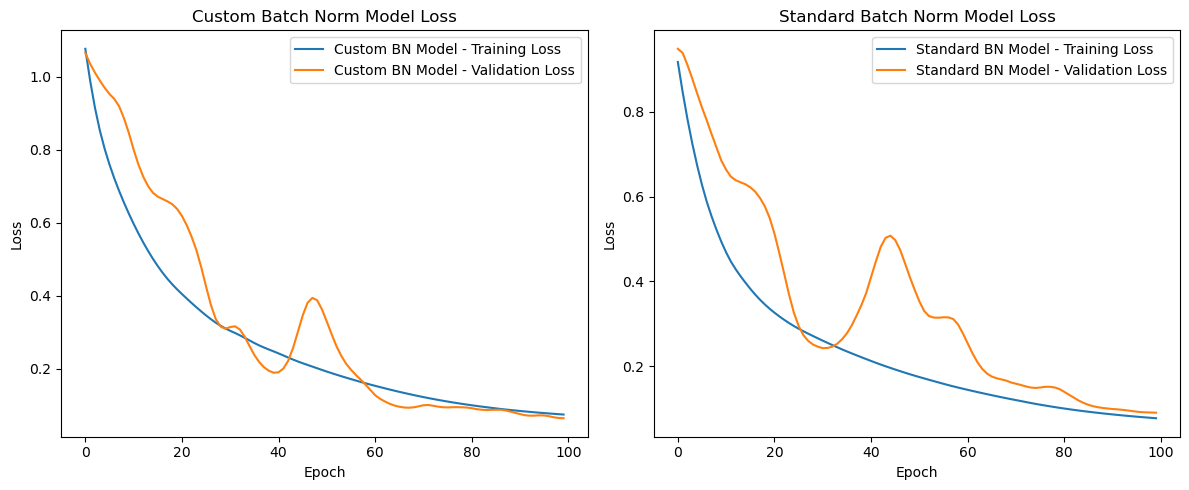

In [33]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(train_losses_custom_bn, label='Custom BN Model - Training Loss')
plt.plot(val_losses_custom_bn, label='Custom BN Model - Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Custom Batch Norm Model Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(train_losses_standard_bn, label='Standard BN Model - Training Loss')
plt.plot(val_losses_standard_bn, label='Standard BN Model - Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Standard Batch Norm Model Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [34]:
custom_bn_model.eval()
standard_bn_model.eval()
with torch.no_grad():
    # Custom BN model:
    val_outputs_custom_bn = custom_bn_model(X_val)
    _, predicted_custom_bn = torch.max(val_outputs_custom_bn.data, 1)
    total_custom_bn = y_val.size(0)
    correct_custom_bn = (predicted_custom_bn == y_val).sum().item()
    accuracy_custom_bn = (correct_custom_bn / total_custom_bn) * 100

    # Standard BN model:
    val_outputs_standard_bn = standard_bn_model(X_val)
    _, predicted_standard_bn = torch.max(val_outputs_standard_bn.data, 1)
    total_standard_bn = y_val.size(0)
    correct_standard_bn = (predicted_standard_bn == y_val).sum().item()
    accuracy_standard_bn = (correct_standard_bn / total_standard_bn) * 100

print(f'Custom Batch Norm Model Validation Accuracy: {accuracy_custom_bn:.2f}%')
print(f'Standard Batch Norm Model Validation Accuracy: {accuracy_standard_bn:.2f}%')

Custom Batch Norm Model Validation Accuracy: 96.67%
Standard Batch Norm Model Validation Accuracy: 96.67%


## Testing and validating custom layers


##### **Q20: How do you perform unit tests for a custom layer to ensure the output dimensions and gradients are correct?**


In [35]:
def test_custom_layer():
    input_tensor = torch.randn(10, 5, requires_grad=True)
    custom_layer = CustomLinearLayer(5, 3)
    output = custom_layer(input_tensor)
    assert output.shape == (10, 3), "Output shape mismatch"
    output.sum().backward()
    assert input_tensor.grad is not None, "Gradients not computed for input"
    print("Custom layer test passed.")

In [36]:
test_custom_layer()

Custom layer test passed.


##### **Q21: How do you inspect the gradients of a custom layer during backpropagation to verify proper gradient flow?**


In [37]:
input_tensor = torch.randn(10, 5, requires_grad=True)
custom_layer = CustomLinearLayer(5, 3)
output = custom_layer(input_tensor)
loss = output.sum()
loss.backward()

In [38]:
print("Gradients of input tensor:")
print(input_tensor.grad)

print("Gradients of weights:")
print(custom_layer.weight.grad)

print("Gradients of biases:")
print(custom_layer.bias.grad)

Gradients of input tensor:
tensor([[-1.3907,  1.4091, -1.1337,  0.3879,  0.1093],
        [-1.3907,  1.4091, -1.1337,  0.3879,  0.1093],
        [-1.3907,  1.4091, -1.1337,  0.3879,  0.1093],
        [-1.3907,  1.4091, -1.1337,  0.3879,  0.1093],
        [-1.3907,  1.4091, -1.1337,  0.3879,  0.1093],
        [-1.3907,  1.4091, -1.1337,  0.3879,  0.1093],
        [-1.3907,  1.4091, -1.1337,  0.3879,  0.1093],
        [-1.3907,  1.4091, -1.1337,  0.3879,  0.1093],
        [-1.3907,  1.4091, -1.1337,  0.3879,  0.1093],
        [-1.3907,  1.4091, -1.1337,  0.3879,  0.1093]])
Gradients of weights:
tensor([[ 2.5403,  2.5403,  2.5403],
        [-5.8310, -5.8310, -5.8310],
        [-0.6310, -0.6310, -0.6310],
        [-2.0202, -2.0202, -2.0202],
        [ 0.8848,  0.8848,  0.8848]])
Gradients of biases:
tensor([10., 10., 10.])


##### **Q22: How do you evaluate the performance of a custom layer on a simple classification or regression task using a validation dataset?**

In [39]:
model.eval()
with torch.no_grad():
    val_outputs = model(X_val)
    _, predicted = torch.max(val_outputs.data, 1)
    total = y_val.size(0)
    correct = (predicted == y_val).sum().item()
    accuracy = (correct / total) * 100
    print(f'Validation Accuracy: {accuracy:.2f}%')

Validation Accuracy: 100.00%


## Experimenting with custom layers


##### **Q23: How do you modify the architecture of a custom layer and observe the effect on performance?**


In [40]:
class ModifiedCustomLayer(nn.Module):  # Modified custom layer with additional parameters and activation function
    def __init__(self, input_size, hidden_size, output_size):
        super(ModifiedCustomLayer, self).__init__()
        self.linear1 = CustomLinearLayer(input_size, hidden_size)
        self.activation = nn.ReLU()
        self.linear2 = CustomLinearLayer(hidden_size, output_size)

    def forward(self, x):
        x = self.linear1(x)
        x = self.activation(x)
        x = self.linear2(x)
        return x

In [41]:
class ModifiedModel(nn.Module):  # Model using ModifiedCustomLayer
    def __init__(self, input_size, hidden_size, output_size):
        super(ModifiedModel, self).__init__()
        self.modified_layer = ModifiedCustomLayer(input_size, hidden_size, hidden_size)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.modified_layer(x)
        x = self.fc(x)
        return x

In [42]:
class OriginalModel(nn.Module):  # Original model for comparison
    def __init__(self, input_size, hidden_size, output_size):
        super(OriginalModel, self).__init__()
        self.custom_layer = CustomLinearLayer(input_size, hidden_size)
        self.activation = nn.ReLU()
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.custom_layer(x)
        x = self.activation(x)
        x = self.fc(x)
        return x

In [43]:
num_epochs = 100
learning_rate = 0.01

modified_model = ModifiedModel(input_size=4, hidden_size=16, output_size=3).to(device)
original_model = OriginalModel(input_size=4, hidden_size=16, output_size=3).to(device)

criterion = nn.CrossEntropyLoss()
optimizer_modified = optim.Adam(modified_model.parameters(), lr=learning_rate)
optimizer_original = optim.Adam(original_model.parameters(), lr=learning_rate)

train_losses_modified = []
val_losses_modified = []
train_losses_original = []
val_losses_original = []

In [44]:
for epoch in range(num_epochs):
    modified_model.train()
    optimizer_modified.zero_grad()
    outputs_modified = modified_model(X_train)
    loss_modified = criterion(outputs_modified, y_train)
    loss_modified.backward()
    optimizer_modified.step()
    train_losses_modified.append(loss_modified.item())

    modified_model.eval()
    with torch.no_grad():
        val_outputs_modified = modified_model(X_val)
        val_loss_modified = criterion(val_outputs_modified, y_val)
        val_losses_modified.append(val_loss_modified.item())

    original_model.train()
    optimizer_original.zero_grad()
    outputs_original = original_model(X_train)
    loss_original = criterion(outputs_original, y_train)
    loss_original.backward()
    optimizer_original.step()
    train_losses_original.append(loss_original.item())

    original_model.eval()
    with torch.no_grad():
        val_outputs_original = original_model(X_val)
        val_loss_original = criterion(val_outputs_original, y_val)
        val_losses_original.append(val_loss_original.item())

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}]")
        print(f"Modified Model - Training Loss: {loss_modified.item():.4f}, Validation Loss: {val_loss_modified.item():.4f}")
        print(f"Original Model - Training Loss: {loss_original.item():.4f}, Validation Loss: {val_loss_original.item():.4f}")

Epoch [10/100]
Modified Model - Training Loss: 0.6537, Validation Loss: 0.6027
Original Model - Training Loss: 0.8193, Validation Loss: 0.7403
Epoch [20/100]
Modified Model - Training Loss: 0.4004, Validation Loss: 0.3846
Original Model - Training Loss: 0.5745, Validation Loss: 0.5547
Epoch [30/100]
Modified Model - Training Loss: 0.2017, Validation Loss: 0.2024
Original Model - Training Loss: 0.4430, Validation Loss: 0.4119
Epoch [40/100]
Modified Model - Training Loss: 0.1032, Validation Loss: 0.1260
Original Model - Training Loss: 0.3705, Validation Loss: 0.3525
Epoch [50/100]
Modified Model - Training Loss: 0.0756, Validation Loss: 0.0799
Original Model - Training Loss: 0.3190, Validation Loss: 0.3015
Epoch [60/100]
Modified Model - Training Loss: 0.0666, Validation Loss: 0.0696
Original Model - Training Loss: 0.2744, Validation Loss: 0.2558
Epoch [70/100]
Modified Model - Training Loss: 0.0631, Validation Loss: 0.0597
Original Model - Training Loss: 0.2343, Validation Loss: 0.2182

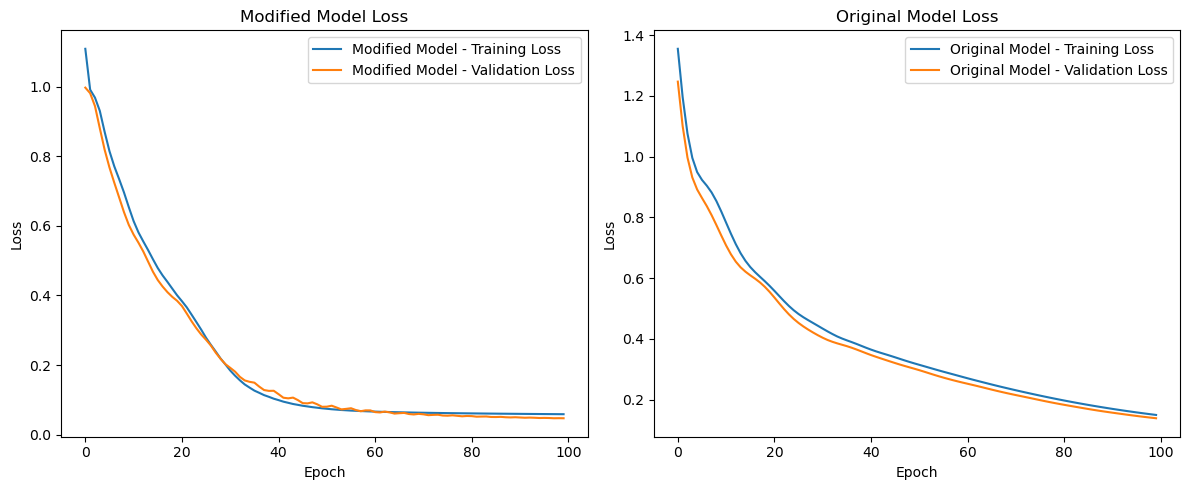

In [45]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(train_losses_modified, label='Modified Model - Training Loss')
plt.plot(val_losses_modified, label='Modified Model - Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Modified Model Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(train_losses_original, label='Original Model - Training Loss')
plt.plot(val_losses_original, label='Original Model - Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Original Model Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [46]:
modified_model.eval()
original_model.eval()
with torch.no_grad():
    # Modified model
    val_outputs_modified = modified_model(X_val)
    _, predicted_modified = torch.max(val_outputs_modified.data, 1)
    total_modified = y_val.size(0)
    correct_modified = (predicted_modified == y_val).sum().item()
    accuracy_modified = (correct_modified / total_modified) * 100

    # Original model
    val_outputs_original = original_model(X_val)
    _, predicted_original = torch.max(val_outputs_original.data, 1)
    total_original = y_val.size(0)
    correct_original = (predicted_original == y_val).sum().item()
    accuracy_original = (correct_original / total_original) * 100

print(f'Modified Model Validation Accuracy: {accuracy_modified:.2f}%')
print(f'Original Model Validation Accuracy: {accuracy_original:.2f}%')

Modified Model Validation Accuracy: 100.00%
Original Model Validation Accuracy: 100.00%


##### **Q24: How do you test different initialization techniques for the weights in your custom layers, and how do they affect the model’s convergence?**


In [47]:
initializations = ['xavier_uniform', 'kaiming_uniform', 'orthogonal']
train_losses_dict = {}

In [48]:
for init_method in initializations:
    print(f"\nTesting initialization: {init_method}")
    model = FeedforwardModel(input_size=4, hidden_size=16, output_size=3).to(device)  # Define the model

    # Apply different initialization methods:
    for m in model.modules():
        if isinstance(m, CustomLinearLayer):
            if init_method == 'xavier_uniform':
                init.xavier_uniform_(m.weight)
            elif init_method == 'kaiming_uniform':
                init.kaiming_uniform_(m.weight, nonlinearity='relu')
            elif init_method == 'orthogonal':
                init.orthogonal_(m.weight)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.01)

    num_epochs = 100
    train_losses = []

    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())

    train_losses_dict[init_method] = train_losses


Testing initialization: xavier_uniform

Testing initialization: kaiming_uniform

Testing initialization: orthogonal


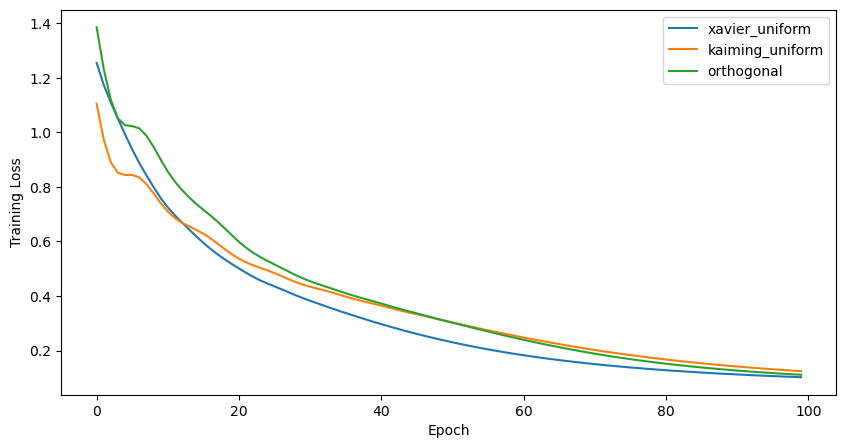

In [49]:
plt.figure(figsize=(10, 5))
for init_method in initializations:
    plt.plot(train_losses_dict[init_method], label=f'{init_method}')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend()
plt.show()

##### **Q25: How do you experiment with adding multiple custom layers in a network and measure their impact on model accuracy or loss?**

In [50]:
class MultiLayerModel(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        super(MultiLayerModel, self).__init__()
        layers = []
        in_size = input_size
        for hidden_size in hidden_sizes:
            layers.append(CustomLinearLayer(in_size, hidden_size))
            layers.append(nn.ReLU())
            in_size = hidden_size
        layers.append(nn.Linear(in_size, output_size))
        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)

In [51]:
layer_configs = [
    [16],
    [32, 16],
    [64, 32, 16]
]
accuracy_dict = {}

In [52]:
for config in layer_configs:
    print(f"\nTesting model with layers: {config}")
    model = MultiLayerModel(input_size=4, hidden_sizes=config, output_size=3).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    num_epochs = 50
    train_losses = []

    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val)
        _, predicted = torch.max(val_outputs.data, 1)
        total = y_val.size(0)
        correct = (predicted == y_val).sum().item()
        accuracy = (correct / total) * 100
        accuracy_dict[str(config)] = accuracy
        print(f'Validation Accuracy: {accuracy:.2f}%')


Testing model with layers: [16]
Validation Accuracy: 96.67%

Testing model with layers: [32, 16]
Validation Accuracy: 96.67%

Testing model with layers: [64, 32, 16]
Validation Accuracy: 100.00%


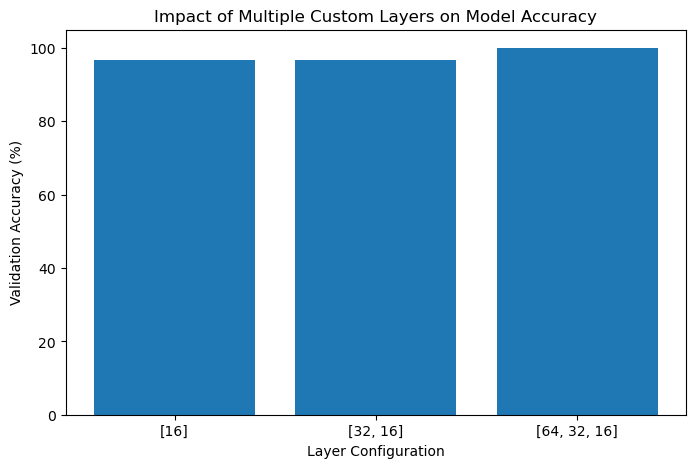

In [53]:
configs = list(accuracy_dict.keys())
accuracies = list(accuracy_dict.values())

plt.figure(figsize=(8, 5))
plt.bar(configs, accuracies)
plt.xlabel('Layer Configuration')
plt.ylabel('Validation Accuracy (%)')
plt.title('Impact of Multiple Custom Layers on Model Accuracy')
plt.show()